In [1]:
import numpy as np

In [34]:
DIR = './datasets/ravdess/'
DIR2 = './datasets/toronto/'

In [35]:
from features_utils import features_extraction
from dataset_utils import Dataset

d = Dataset(DIR, features_extraction)
categories = d.get_categories()
dataset = d.get_dataset()

dataset.shape

C:\ProgramData\Anaconda3\lib\site-packages\pydub\utils.py:165: RuntimeWarning: Couldn't find ffmpeg or avconv - defaulting to ffmpeg, but may not work
  warn("Couldn't find ffmpeg or avconv - defaulting to ffmpeg, but may not work", RuntimeWarning)


(1248, 105)

In [71]:
categories = {0: 'Angry',
 1: 'Disgust',
 2: 'Fear',
 3: 'Happy',
 4: 'Neutral',
 5: 'Sad',
 6: 'Surprise'}

In [37]:
d.save_to_csv('dataset_ravdess_104.csv')

In [38]:
X_ravdess = dataset[:,:-1]
y_ravdess = dataset[:,-1]

In [39]:
d = Dataset(DIR2, features_extraction)
categories = d.get_categories()
dataset = d.get_dataset()

dataset.shape

(2800, 105)

In [29]:
categories.values()

dict_values(['Angry', 'Disgust', 'Fear', 'Happy', 'Neutral', 'Sad', 'Surprise'])

In [41]:
d.save_to_csv('dataset_toronto_104.csv')

In [42]:
X_toronto = dataset[:,:-1]
y_toronto = dataset[:,-1]

In [3]:
toronto = np.genfromtxt('dataset_toronto_104.csv', delimiter=',')

In [4]:
ravdess = np.genfromtxt('dataset_ravdess_104.csv', delimiter=',')

In [5]:
ravdess.shape

(1248, 105)

In [6]:
from sklearn.model_selection import train_test_split

toronto_train, toronto_test = train_test_split(toronto, test_size=0.3)

In [7]:
ravdess_train, ravdess_test = train_test_split(ravdess, test_size=0.3)

In [8]:
train = np.concatenate((toronto_train, ravdess_train))

In [9]:
test = np.concatenate((toronto_test, ravdess_test))

In [10]:
np.random.shuffle(test)
np.random.shuffle(train)

In [11]:
X_train = train[:,:-1]
y_train = train[:,-1]

In [12]:
X_test = test[:,:-1]
y_test = test[:,-1]

In [13]:
X_test_toronto = toronto_test[:,:-1]
y_test_toronto = toronto_test[:,-1]

In [14]:
X_test_ravdess = ravdess_test[:,:-1]
y_test_ravdess = ravdess_test[:,-1]

In [15]:
from sklearn.svm import SVC

In [42]:
from sklearn.model_selection import GridSearchCV

parameters = {'kernel':['poly'], 'degree':[1, 5]}
svc = SVC()
clf = GridSearchCV(svc, parameters)
clf.fit(X_train, y_train)

print(clf.best_estimator_)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=5, gamma='auto', kernel='poly',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)


In [16]:
clf = SVC(kernel='poly', degree=3, probability=True)

In [17]:
clf.fit(X_train, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='poly',
  max_iter=-1, probability=True, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [18]:
clf.score(X_test, y_test)

0.87407407407407411

In [19]:
clf.score(X_test_toronto, y_test_toronto)

0.9642857142857143

In [20]:
clf.score(X_test_ravdess, y_test_ravdess)

0.67200000000000004

In [60]:
y_pred = clf.predict(X_test)
y_pred_toronto = clf.predict(X_test_toronto)
y_pred_ravdess = clf.predict(X_test_ravdess)

In [ ]:
# from sklearn.model_selection import cross_val_score

# scores = cross_val_score(clf, X, y, cv=10)
# scores

In [22]:
from sklearn.metrics import confusion_matrix

y_predict = clf.predict(X_test)
c_matrix = confusion_matrix(y_test, y_predict)
c_matrix

array([[169,   6,   3,   4,   1,   3,   2],
       [  9, 163,   0,   2,   2,   2,   5],
       [  2,   4, 154,   8,   0,   4,   6],
       [  3,   4,   4, 162,   0,   3,   5],
       [  2,   3,   0,   1, 137,   6,   0],
       [  3,   5,   2,   7,   2, 148,   0],
       [  7,  10,   5,  12,   4,   2, 129]], dtype=int64)

In [23]:
from sklearn.metrics import confusion_matrix

In [24]:
print([c_matrix[i,i]/c_matrix[i].sum() for i in range(c_matrix.shape[0])])

[0.89893617021276595, 0.89071038251366119, 0.8651685393258427, 0.89502762430939231, 0.91946308724832215, 0.88622754491017963, 0.76331360946745563]


In [25]:
from plot_confusion_matrix import plot_confusion_matrix
import matplotlib.pyplot as plt
%matplotlib inline

In [26]:
cnf_matrix = confusion_matrix(y_test_toronto, y_pred_toronto)

Normalized confusion matrix


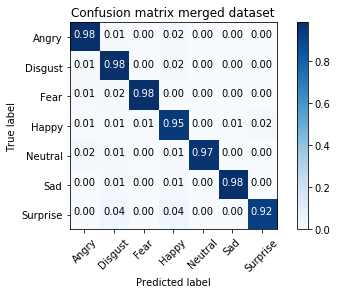

In [30]:
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=categories.values(), normalize=True,
                      title='Confusion matrix merged dataset')

In [33]:
cnf_matrix = confusion_matrix(y_test_ravdess, y_pred_ravdess)

Normalized confusion matrix


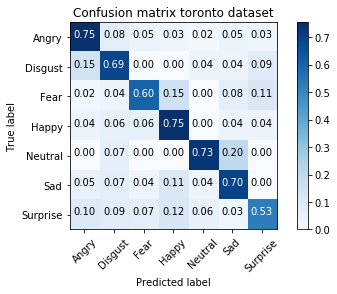

In [34]:
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=categories.values(), normalize=True,
                      title='Confusion matrix toronto dataset')

In [35]:
cnf_matrix = confusion_matrix(y_test, y_pred)

Normalized confusion matrix


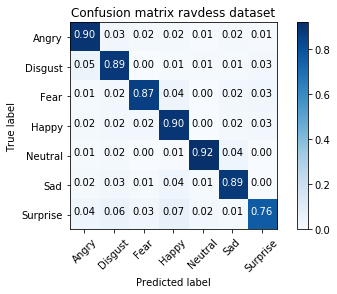

In [36]:
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=categories.values(), normalize=True,
                      title='Confusion matrix ravdess dataset')

In [59]:
def seventothree(y):
    y = y.copy()
    y[(y == 0)|(y == 1)|(y == 2)|(y == 5)] = 0
    y[y == 4] = 1
    y[(y == 3)|(y == 6)] = 2
    return y

In [64]:
y_pred_3 = seventothree(y_pred)
y_pred_toronto_3 = seventothree(y_pred_toronto)
y_pred_ravdess_3 = seventothree(y_pred_ravdess)
y_test_3 = seventothree(y_test)
y_test_toronto_3 = seventothree(y_test_toronto)
y_test_ravdess_3 = seventothree(y_test_ravdess)

In [65]:
y_pred

array([ 5.,  2.,  1., ...,  1.,  2.,  2.])

In [67]:
y_pred_3[:100]

array([ 0.,  0.,  0.,  2.,  1.,  0.,  0.,  0.,  2.,  1.,  1.,  0.,  0.,
        0.,  0.,  0.,  2.,  1.,  0.,  2.,  2.,  0.,  0.,  1.,  2.,  2.,
        0.,  2.,  0.,  1.,  0.,  1.,  2.,  0.,  1.,  0.,  2.,  0.,  0.,
        0.,  0.,  0.,  2.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  1.,  2.,
        0.,  2.,  0.,  0.,  1.,  2.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  2.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        2.,  2.,  0.,  2.,  2.,  0.,  1.,  0.,  0.,  1.,  0.,  1.,  0.,
        2.,  0.,  0.,  0.,  1.,  0.,  2.,  2.,  2.])

In [74]:
categories_3 = {0: 'Negative',
 1: 'Neutral',
 2: 'Positive'}

In [99]:
cnf_matrix = confusion_matrix(y_test_toronto_3, y_pred_toronto_3)

Normalized confusion matrix


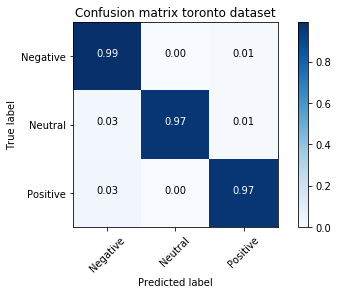

In [100]:
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=categories_3.values(), normalize=True,
                      title='Confusion matrix toronto dataset')

In [77]:
cnf_matrix = confusion_matrix(y_test_ravdess_3, y_pred_ravdess_3)

Normalized confusion matrix


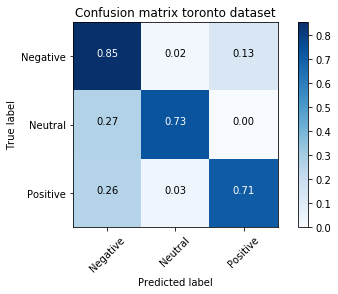

In [78]:
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=categories_3.values(), normalize=True,
                      title='Confusion matrix toronto dataset')

In [97]:
cnf_matrix = confusion_matrix(y_test_3, y_pred_3)

Normalized confusion matrix


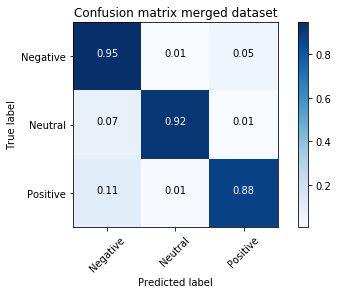

In [98]:
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=categories_3.values(), normalize=True,
                      title='Confusion matrix merged dataset')

In [90]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

In [84]:
accuracy_score(y_test_3, y_pred_3)

0.92345679012345683

In [85]:
accuracy_score(y_test_ravdess_3, y_pred_ravdess_3)

0.79733333333333334

In [86]:
accuracy_score(y_test_toronto_3, y_pred_toronto_3)

0.97976190476190472